# Aufgabenblatt 01

## Aufgabe 1
a) Gegeben sind drei verschiedene Regressionsgeraden (rot-gestrichelte Linie). Bestimmen Sie für jede der Geraden A, B und C die beiden Parameter $\beta_0$ und $\beta_1$ durch Ablesen aus der Grafik.

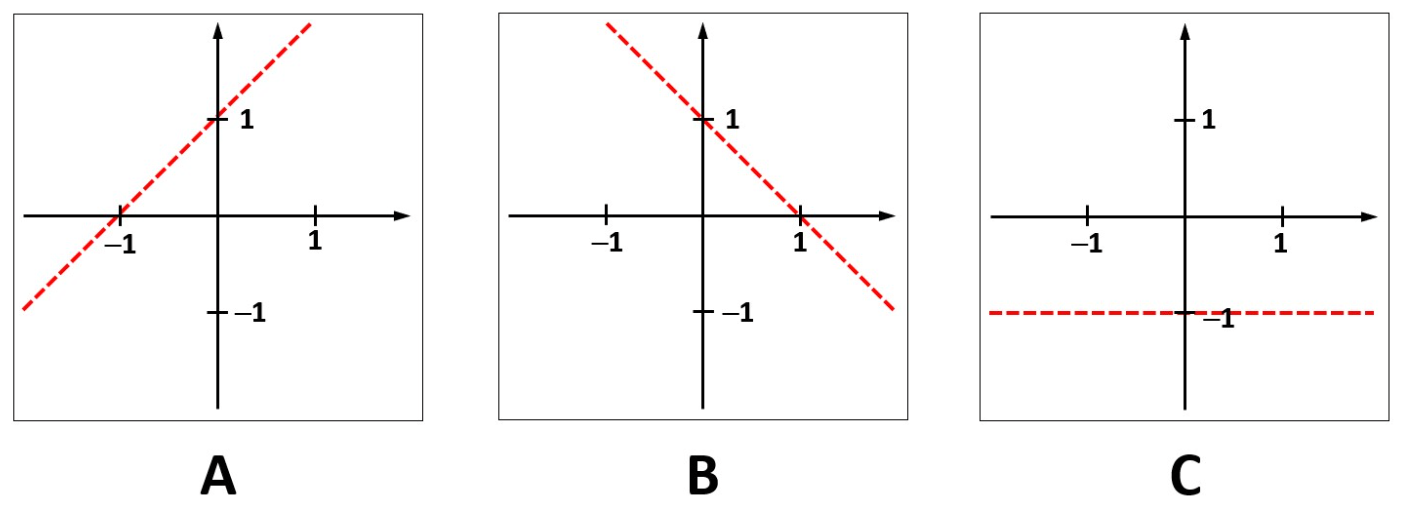

### Lösung
- A: $\beta_0$= 1 , $\beta_1$= 1
- B: $\beta_0$= 1, $\beta_1$= -1
- C: $\beta_0$= -1, $\beta_1 = 0$ 


b) Gegeben sind folgende Datenerhebungen A, B und C mit den zugehörigen Datenpunkten. Entscheiden Sie für jede Erhebung, ob eine Analyse mittels linearer Regression möglich ist und begründen Sie kurz Ihre Antwort, falls dies nicht geht.

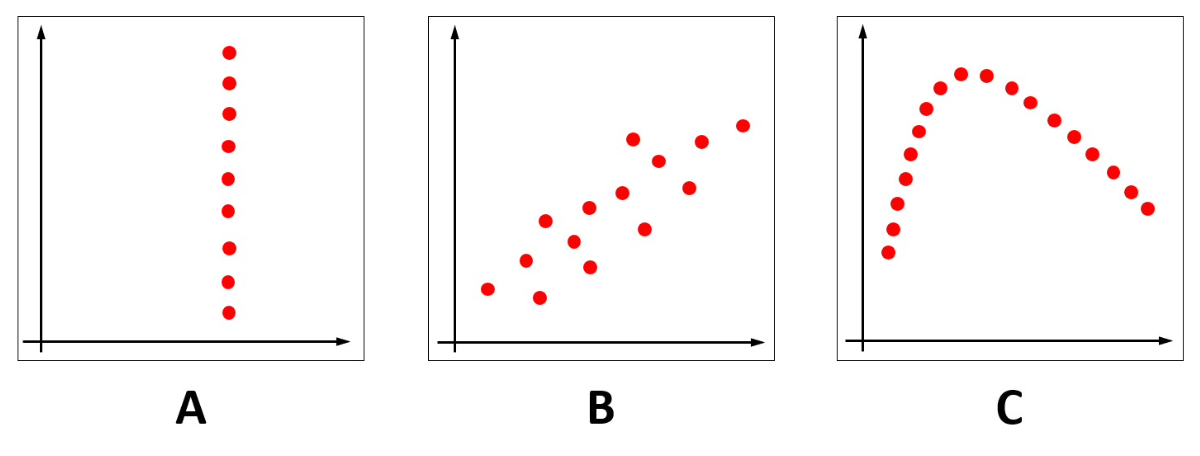

### Lösung

- A: Keine Regression möglich, da kein zusammenhang der Variablen **(Musterlösung, steigung = Unendlich)**
- B: Lineare Regression möglich 
- C: Keine Regression möglich, da kein Linearer zusammenhang **(Musterlösung $R^2$ ist tief)**

## Aufgabe 2

Der „California Housing“-Datensatz aus dem Paket sklearn.datasets beinhaltet
verschiedene Informationen aus 20.640 Haushalten in Kalifornien. Laden Sie diesen Datensatz
und nutzen Sie daraus die Spalten 2 (durchschnittliche Anzahl an Räumen) und 3
(durchschnittliche Anzahl an Schlafzimmern) für eine Regressionsanalyse. Gehen Sie dazu wie
folgt vor: 

In [1]:
# Vorbereitung Aufgabe 
from sklearn import datasets 
data = datasets.fetch_california_housing() 
data_x = data.data[:,2]
data_y = data.data[:,3] 
data_x = data_x.reshape((-1,1)) ## hinzugefügt
x_data = data_x
y_data = data_y

In [2]:
data_x

array([[6.98412698],
       [6.23813708],
       [8.28813559],
       ...,
       [5.20554273],
       [5.32951289],
       [5.25471698]])

Teilen Sie die Daten im Verhältnis 80:20 in Trainings- und Testdaten auf und führen Sie damit
eine Regressionsanalyse durch, um festzustellen, ob es einen linearen Zusammenhang
zwischen Anzahl an Räumen und Anzahl an Schlafzimmern gibt. Bestimmen Sie für den
Testdatensatz zudem den MSE sowie R2
-Wert und plotten Sie Ihre Ergebnisse in einem
Diagramm. 

### Lösung

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns  # Schönere Grafiken
import numpy as np
from sklearn.linear_model import LinearRegression as lr

In [4]:
split=int(data_x.size/100*20)
print(split)

4128


In [5]:
#split in train und test 
data_x.size
x_train = x_data[:-split]
x_test = x_data[-split:]
y_train = y_data[:-split]
y_test = y_data[-split:]

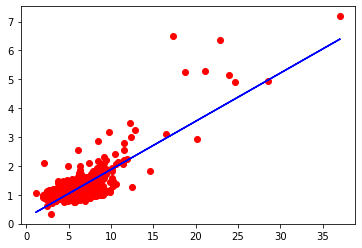

In [6]:
model = lr()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
plt.plot(x_test,y_test,'ro')
plt.plot(x_test,y_pred,'b-')
plt.show()

In [7]:
r2_score(y_test, y_pred)

0.22703839297118267

In [8]:
mse(y_test, y_pred, squared=True) 

0.053011222965721215

# Aufgabenblatt 2

## Aufgabe 1
a) Gegeben ist folgende Tabelle mit n = 12 Werten der tatsächlichen Klassifikation y und der
durch k-Nächste-Nachbarn vorhergesagten Klassifikation ŷ eines Datensatzes (Klassen 0
und 1). Bestimmen Sie die Treffsicherheit des Algorithmus. 

b) Wie gross ist demnach die Fehlinterpretationsrate (Hamming-Verlust)?
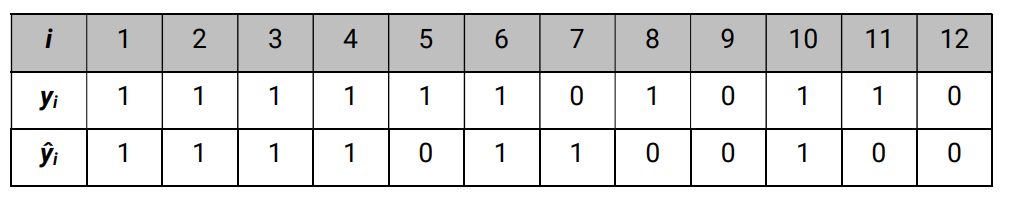

In [19]:
# a) Treffsicherheit berechnen
treffsicherheit = 1/12*(1 + 1 + 1 + 1 + 0 + 1 + 0 + 0 + 1 + 1 + 0 + 1)
print(treffsicherheit,"oder", str(treffsicherheit*100)+"%")
# b Hamming Verlust
print(1-treffsicherheit,"oder", str(((1-treffsicherheit)*100))+"%")

0.6666666666666666 oder 66.66666666666666%
0.33333333333333337 oder 33.333333333333336%


## Aufgabe 2 
Die Datei „wine.txt“ in Moodle enthält drei Spalten des zugehörigen Datensatzes aus dem
Paket sklearn.datasets. Die ersten beiden Spalten entsprechen 2D-Koordinaten (x und y),
die dritte Spalte entspricht der tatsächlichen Klassifikation der Punkte.

a) Visualisieren Sie die Datei als Streudiagramm (Scatter Plot). 

In [20]:
data = np.loadtxt("wine.txt", delimiter=",")

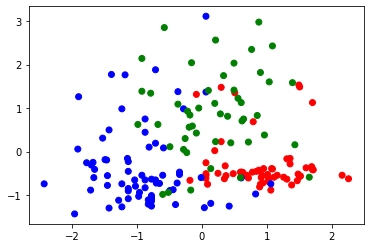

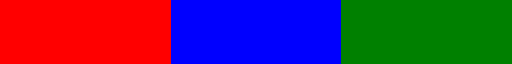

In [26]:
# Daten Plotten 
#plt.axis([10,80,0,120])
colors = ['red', 'blue', 'green'] # Array mit den beiden farben 
# Farbcodierungen in Colormap speichern 
import matplotlib.colors 
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap=cmap)
plt.show()
cmap

- b) Ermitteln Sie anhand der Ellenbogen-Methode den optimalen k-Wert für eine Clusterbildung gemäss k-Mitten-Algorithmus und zeichnen Sie die zugehörige(Trägheits)Kurve. 

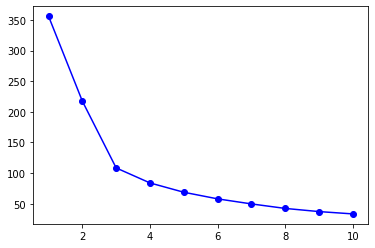

In [30]:
from sklearn.cluster import KMeans
x_data = data[:,:2] # Spalten 0 und 1 -> Koordinaten
y_data = data[:,2] # Spalte 2 -< korrekte Klassifikation
inert = []
for k in range(1,11):
    model = KMeans(k)
    model.fit(x_data)
    inert.append(model.inertia_)
x = np.linspace(1,10,10)
plt.plot(x, inert, 'b-')
plt.plot(x, inert, 'bo')
plt.show() 

Bester wert ist k = 3

- c) Bestimmen Sie für den aus b) ermittelten optimalen k-Wert eine Vorhersage (fit_predict) der Klassenzugehörigkeit aller Punkte der Datei „wine.txt“ und visualisieren Sie das Ergebnis als Streudiagramm. Wie gut stimmt die vorhergesagte Klassifikation – rein optisch betrachtet – mit dem tatsächlichen Ergebnis aus a) überein? 

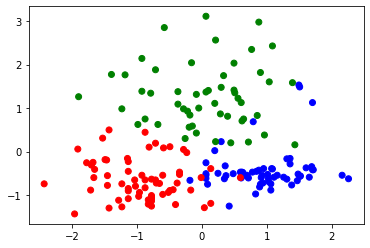

In [32]:
model = KMeans(n_clusters=3, max_iter=300)
# klassifiziere mir meine Daten 
y_pred = model.fit_predict(data)
colors = ['green', 'red', 'blue']
cmap = matplotlib.colors.ListedColormap(colors)
plt.scatter(data[:,0], data[:,1], c=y_pred, cmap=cmap)
plt.show()

# Aufgabenblatt 2